In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
deformable_results = pd.read_csv('../results/deffcn.csv')
fcn_results = pd.read_csv('../results/fcn.csv')
inception_results = pd.read_csv('../results/inceptiontime.csv')

In [8]:
results = pd.concat([deformable_results, fcn_results, inception_results])
results.head()

,model,dataset,exp,acc,f1,recall,precision,time
0,deffcn,ACSF1,0,0.91,0.702481,0.689667,0.720267,760.695683
1,deffcn,ACSF1,1,0.91,0.715328,0.703333,0.734061,764.513032
2,deffcn,ACSF1,2,0.90,0.700138,0.682667,0.725333,774.868585
3,deffcn,ACSF1,3,0.91,0.708434,0.695667,0.728000,749.109185
4,deffcn,ACSF1,4,0.90,0.693661,0.680867,0.714341,747.050898


In [16]:
grouped_results = results.groupby(by=['model', 'dataset'], as_index=False).mean()
grouped_results.shape

(336, 8)

In [17]:
def set_color(acc1, acc2):
    colors = []
    for i in range(len(acc1)):
        if acc1[i] > acc2[i]:
            colors.append('blue')
        elif acc2[i] > acc1[i]:
            colors.append('red')
        else:
            colors.append('green')
    return colors

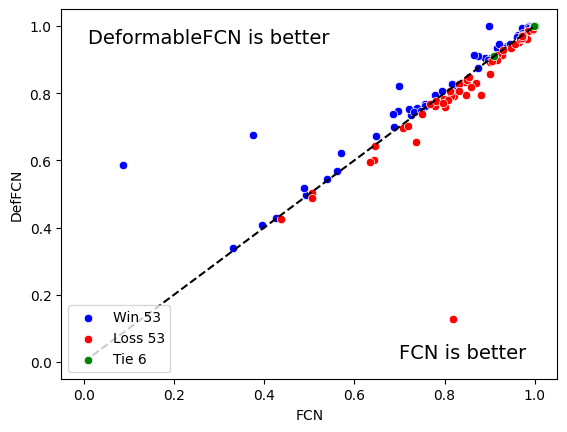

In [18]:
fcn_acc = grouped_results.query(f'model == "fcn"').sort_values(by='dataset').acc.values
def_fcn_acc = grouped_results.query(f'model == "deffcn"').sort_values(by='dataset').acc.values

sns.scatterplot(
    x=fcn_acc[fcn_acc < def_fcn_acc],
    y=def_fcn_acc[fcn_acc < def_fcn_acc],
    color='blue',
    label=f'Win {len(def_fcn_acc[fcn_acc < def_fcn_acc])}'
)

sns.scatterplot(
    x=fcn_acc[fcn_acc > def_fcn_acc],
    y=def_fcn_acc[fcn_acc > def_fcn_acc],
    color='red',
    label=f'Loss {len(def_fcn_acc[fcn_acc > def_fcn_acc])}'
)

sns.scatterplot(
    x=fcn_acc[fcn_acc == def_fcn_acc],
    y=def_fcn_acc[fcn_acc == def_fcn_acc],
    color='green',
    label=f'Tie {len(def_fcn_acc[fcn_acc == def_fcn_acc])}'
)

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('FCN')
plt.ylabel('DefFCN')

plt.text(0.7, 0.01, 'FCN is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})

plt.legend(loc='lower left')

plt.show()

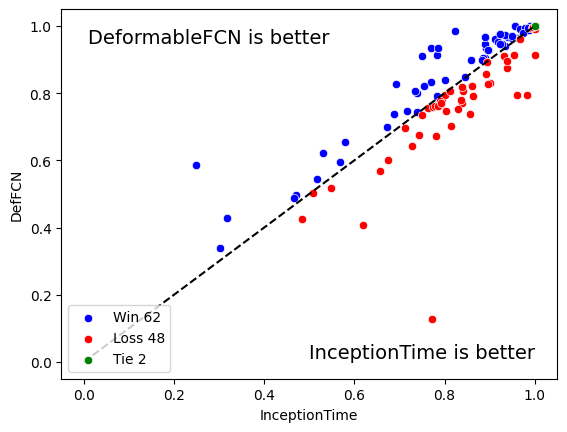

In [21]:
lite_acc = grouped_results.query(f'model == "inceptiontime"').sort_values(by='dataset').acc.values
def_fcn_acc = grouped_results.query(f'model == "deffcn"').sort_values(by='dataset').acc.values

sns.scatterplot(
    x=lite_acc[lite_acc < def_fcn_acc],
    y=def_fcn_acc[lite_acc < def_fcn_acc],
    color='blue',
    label=f'Win {len(def_fcn_acc[lite_acc < def_fcn_acc])}'
)

sns.scatterplot(
    x=lite_acc[lite_acc > def_fcn_acc],
    y=def_fcn_acc[lite_acc > def_fcn_acc],
    color='red',
    label=f'Loss {len(def_fcn_acc[lite_acc > def_fcn_acc])}'
)

sns.scatterplot(
    x=lite_acc[lite_acc == def_fcn_acc],
    y=def_fcn_acc[lite_acc == def_fcn_acc],
    color='green',
    label=f'Tie {len(def_fcn_acc[lite_acc == def_fcn_acc])}'
)

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('InceptionTime')
plt.ylabel('DefFCN')

plt.text(0.5, 0.01, 'InceptionTime is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})

plt.legend(loc='lower left')
plt.show()

In [25]:
grouped_results.groupby('model').mean()

/tmp/ipykernel_168573/655961237.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_results.groupby('model').mean()


,exp,acc,f1,recall,precision,time
model,,,,,,
deffcn,1.996173,0.820961,0.709935,0.709756,0.734291,977.280072
fcn,2.000000,0.820821,0.702270,0.702969,0.724695,216.460976
inceptiontime,2.000000,0.822360,0.802468,0.804180,0.814162,1305.874744


In [23]:
fcn_results.groupby(by=['dataset'], as_index=False).mean9

,model,dataset,exp,acc,f1,recall,precision,time
0,fcn,ACSF1,0,0.890000,0.641603,0.623533,0.666933,76.280939
1,fcn,ACSF1,1,0.870000,0.631631,0.608867,0.661333,74.347329
2,fcn,ACSF1,2,0.900000,0.643168,0.625400,0.667407,75.506160
3,fcn,ACSF1,3,0.900000,0.705745,0.693400,0.726341,75.448304
4,fcn,ACSF1,4,0.890000,0.627980,0.611400,0.652267,73.670749
...,...,...,...,...,...,...,...,...
555,fcn,Yoga,0,0.859333,0.850243,0.857093,0.859115,128.119155
556,fcn,Yoga,1,0.854667,0.846332,0.852891,0.854426,129.219147
557,fcn,Yoga,2,0.860333,0.852274,0.859692,0.859600,129.333541
558,fcn,Yoga,3,0.864000,0.855882,0.862829,0.864150,130.601870
